In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance
from scipy import ndimage, spatial
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
from skimage.feature import hog
from skimage import feature
import os
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from fcmeans import FCM

In [ ]:
dir_baitap = '/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/'

In [ ]:
def showImage(img_1, img_2, title_1, title_2):
  plt.figure(figsize=(20, 20))
  plt.subplot(1,2,1)
  plt.title(title_1)
  img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
  plt.imshow(img_1, interpolation='bicubic')
  
  plt.subplot(1,2,2)
  plt.title(title_2)
  img_2 = np.array(img_2, dtype=np.uint8)
  img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
  plt.imshow(img_2, interpolation='bicubic')

# Apply the MeanShift and FCM algorithms

In [ ]:
dir_vegetables = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/vegetables.jpg')
dir_hand = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/hand.jpg')
dir_thuoc = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/thuoc.jpg')
dir_dogcat = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/dogcat.jpg')

In [ ]:
def Kmeans(img, n_clusters = 6, op =0):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  if op==0:
    k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    img_res = t.reshape(nrow, ncol, nchl)
    return img_res
  if op==1:
    bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(g)
    labels = ms.labels_
    h = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    arrcolor = np.random.rand(20,3) * 255
    h = arrcolor[labels]
    img_res2 = h.reshape(nrow, ncol, nchl)
    cv2_imshow(img_res2)
  if op==2:
    fcm = FCM(n_clusters=6)
    fcm.fit(g)
    fcm_labels = fcm.predict(g)
    k = fcm.centers[fcm_labels]
    img_res3 = k.reshape(nrow, ncol, nchl)
    cv2_imshow(img_res3)


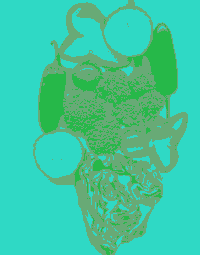

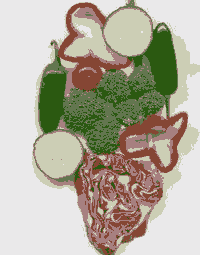

In [ ]:
Kmeans(dir_vegetables,6,1)
Kmeans(dir_vegetables,6,2)

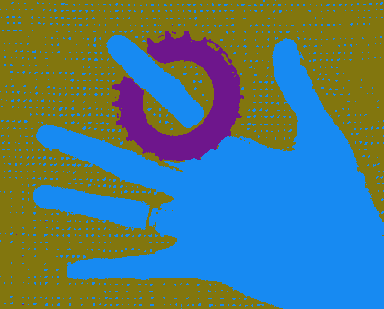

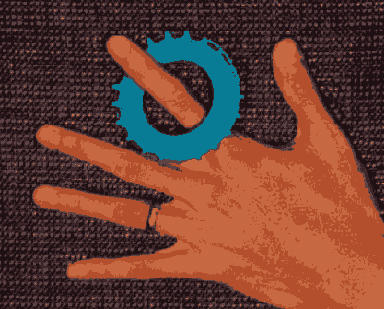

In [ ]:
Kmeans(dir_hand,6,1)
Kmeans(dir_hand,6,2)

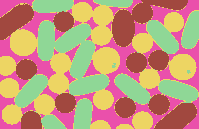

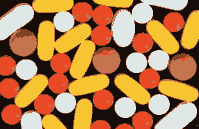

In [ ]:
Kmeans(dir_thuoc,6,1)
Kmeans(dir_thuoc,6,2)

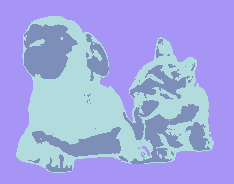

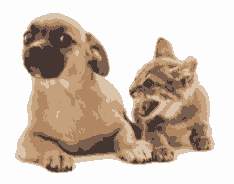

In [ ]:
Kmeans(dir_dogcat,6,1)
Kmeans(dir_dogcat,6,2)

In [ ]:
def Kmeans2(img, n_clusters, option):
             
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape

  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)

  if option==0:
    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    arrcolor = np.random.rand(20,3) * 255
    t = arrcolor[k_means.labels_]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1
  elif option==1:
    # centers = [[1, 1], [-1, -1], [1, -1]]
    # X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
    bandwidth = estimate_bandwidth(g, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(g)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    arrcolor = np.random.rand(20,3) * 255
    t = arrcolor[labels]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1
  elif option==2:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(np.array(g))
    fcm_labels = fcm.predict(np.array(g))
    t = fcm.centers[fcm_labels]
    img_res = img_tmp
    i = 0
    for y in range(nrow):
      for x in range(ncol):
        img_res[y, x] = t[i][0:3]
        i += 1

  return img_res

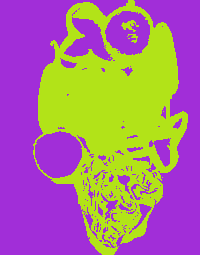

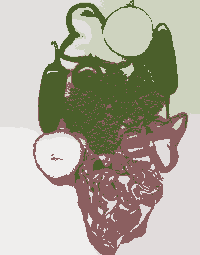

In [ ]:
cv2_imshow(Kmeans2(dir_vegetables,6,1))
cv2_imshow(Kmeans2(dir_vegetables,6,2))

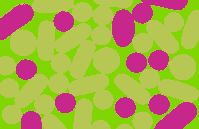

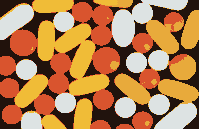

In [ ]:
cv2_imshow(Kmeans2(dir_thuoc,6,1))
cv2_imshow(Kmeans2(dir_thuoc,6,2))

# Apply the Graphcut algorithm for the images



1.   Lionel-Messi.jpg 
2.   Dogcat.jpg
3.   camourflage_xxxxxx.jpg







In [ ]:
dir_messi = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/Lionel-Messi.jpg')
dir_dogcat = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/dogcat.jpg')
dir_camourflage_xxxxxx = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/camourflage_00129.jpg')

In [ ]:
def GraphSeg(path_filename, x, y, w, h):
  img = cv2.imread(path_filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  print(img.shape)

  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv2.grabCut(img, mask, rectangle, backgroundModel, foregroundModel, 5, cv2.GC_INIT_WITH_RECT)

  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.imshow(res)
  res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

In [ ]:
messi_path = '/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/Lionel-Messi.jpg'
dogcat_path = ('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/dogcat.jpg')
camourflage_00197 = ('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap6/images/camourflage_00197.jpg')

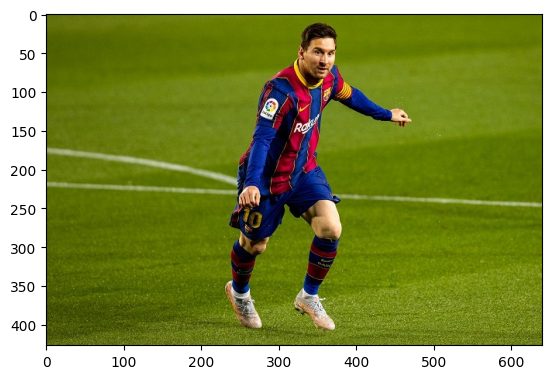

(427, 640, 3)


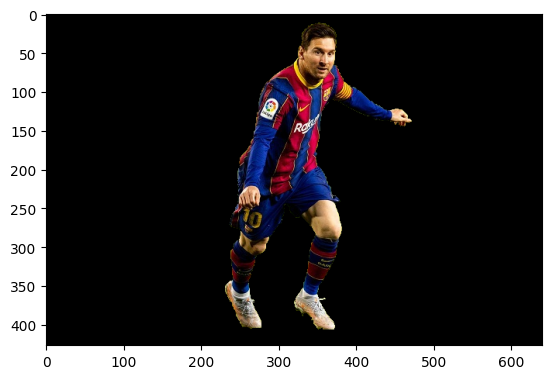

In [ ]:
GraphSeg(messi_path,50,0,450,450)

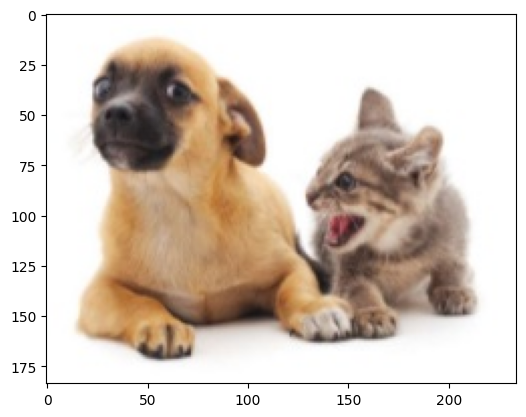

(184, 234, 3)


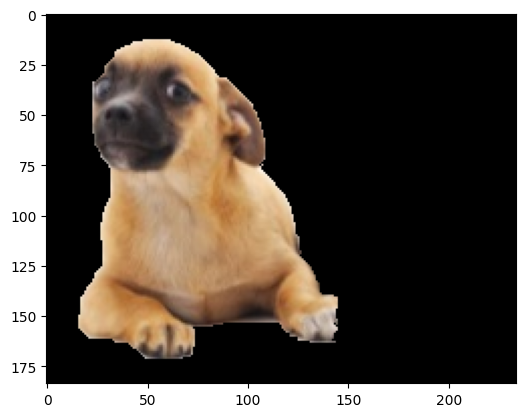

In [ ]:
GraphSeg(dogcat_path,10,0,135,175)

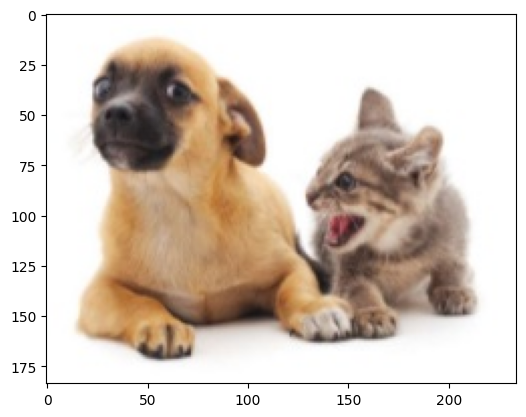

(184, 234, 3)


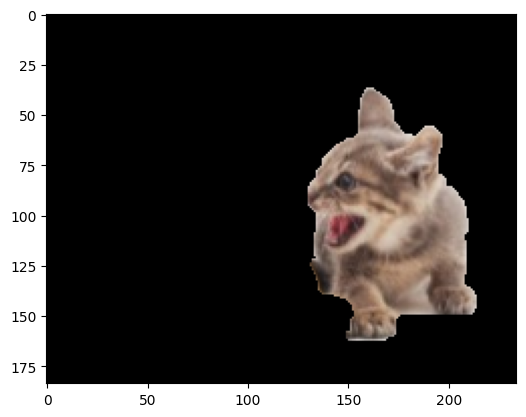

In [ ]:
GraphSeg(dogcat_path,130,35,225,175)

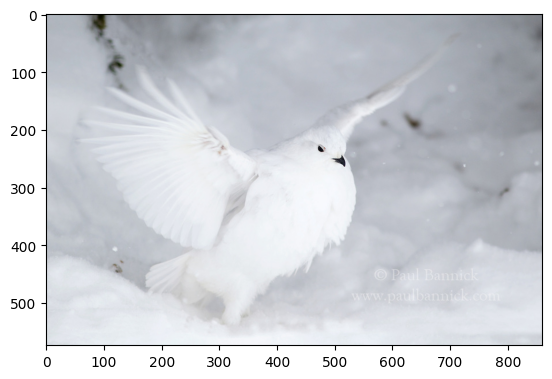

(574, 860, 3)


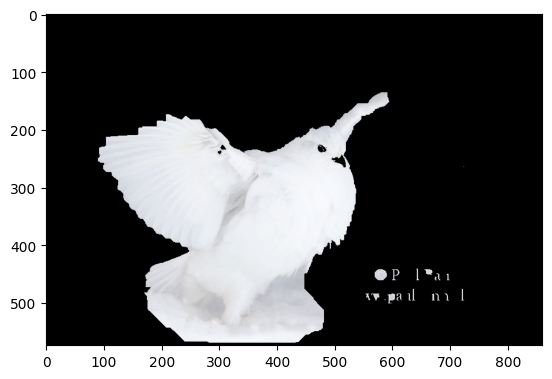

In [44]:
GraphSeg(camourflage_00197, 50,100,700,470)